In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

# Import Titanic Dataset

In [150]:
data = pd.read_csv('titanic.csv')

In [151]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Droping columns

In [152]:
data = data.drop(columns=['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Embarked','Pclass','Fare'])

In [153]:
data

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
...,...,...,...
886,0,male,27.0
887,1,female,19.0
888,0,female,NaN
889,1,male,26.0


In [157]:
data.describe(include='all')

,Survived,Sex,Age
count,891.000000,891,714.000000
unique,NaN,2,NaN
top,NaN,male,NaN
freq,NaN,577,NaN
mean,0.383838,NaN,29.699118
std,0.486592,NaN,14.526497
min,0.000000,NaN,0.420000
25%,0.000000,NaN,20.125000
50%,0.000000,NaN,28.000000
75%,1.000000,NaN,38.000000


In [158]:
data.isnull().count()

Survived    891
Sex         891
Age         891
dtype: int64

In [159]:
data.dtypes

Survived      int64
Sex          object
Age         float64
dtype: object

In [160]:
data.isnull().values.any()

True

# Creating numpy array

In [161]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [162]:
x

array([['male', 22.0],
       ['female', 38.0],
       ['female', 26.0],
       ...,
       ['female', nan],
       ['male', 26.0],
       ['male', 32.0]], dtype=object)

In [163]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Replacing "nan" values with mean in Age feature

In [180]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
x[:,1:] = si.fit_transform(x[:,1:])

In [181]:
x

array([['male', 22.0],
       ['female', 38.0],
       ['female', 26.0],
       ...,
       ['female', 29.69911764705882],
       ['male', 26.0],
       ['male', 32.0]], dtype=object)

# Using Binary encoding convert Gender into 0s and 1s

In [192]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

In [193]:
x

array([[1, 22.0],
       [0, 38.0],
       [0, 26.0],
       ...,
       [0, 29.69911764705882],
       [1, 26.0],
       [1, 32.0]], dtype=object)

In [184]:
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

# Train Test Split

In [185]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y,random_state=1)

# Using Gini split method to predict Decision tree

In [186]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_titanic = DecisionTreeClassifier(random_state=17, max_depth=4)
decision_tree_titanic.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=17)

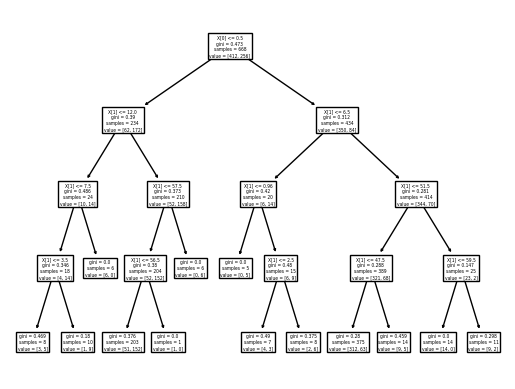

In [187]:
from sklearn import tree
tree.plot_tree(decision_tree_titanic);

In [189]:
tree_graph_to_png(
    tree=decision_tree_titanic,
    feature_names=["Sex", "Age"],
    png_file_to_save="titanic_decision_tree_gini_max_depth4.png",
)

# Model Accuracy with train dataset

In [194]:
j = decision_tree_titanic.score(x_train,y_train)

print("Model Accuracy with Train Dataset : {} %".format(j*100))

Model Accuracy with Train Dataset : 80.53892215568862 %


# Model Accuracy with test dataset

In [195]:
j1 = decision_tree_titanic.score(x_test,y_test)

print("Model Accuracy with Test Dataset : {} %".format(j1*100))

Model Accuracy with Test Dataset : 80.26905829596413 %


# Using entropy split method to predict Decision tree

In [197]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_titanic = DecisionTreeClassifier(random_state=17, criterion='entropy', max_depth=4)
decision_tree_titanic.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=17)

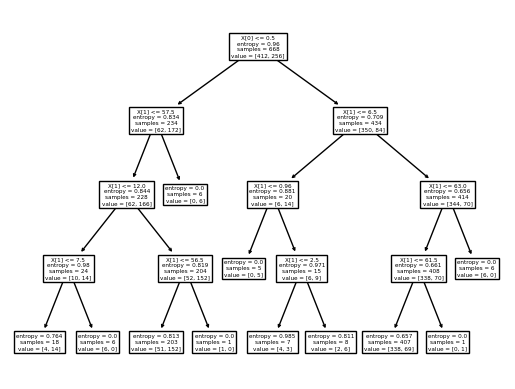

In [198]:
tree.plot_tree(decision_tree_titanic);

In [200]:
tree_graph_to_png(
    tree=decision_tree_titanic,
    feature_names=["Sex", "Age"],
    png_file_to_save="titanic_decision_tree_entropyn.png",
)

# Model Accuracy with train dataset

In [203]:
e1 = decision_tree_titanic.score(x_train,y_train)

print("Model Accuracy with Train Dataset : {} %".format(j*100))

Model Accuracy with Train Dataset : 80.53892215568862 %


# Model Accuracy with test dataset

In [204]:
e2 = decision_tree_titanic.score(x_test,y_test)

print("Model Accuracy with Test Dataset : {} %".format(j1*100))

Model Accuracy with Test Dataset : 80.26905829596413 %
